In [1]:
import os
import numpy as np
from pathlib import Path
import pyvista as pv

In [36]:
cyl_large = pv.Cylinder(center=[-21,-75,44], radius=12, direction=[0,1,0], height=40)

In [37]:
cyl_large.save("/home/max/Desktop/python_projects/SimJeb/SimJEB_metadata/cylinder_horizontal_large.stl")

In [38]:
mesh = pv.read("/home/max/Desktop/python_projects/SimJeb/SimJEB_surfmesh/0.obj")

In [39]:
clipped = mesh.clip_surface(cyl_large, True)

/home/max/miniconda3/envs/dev/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


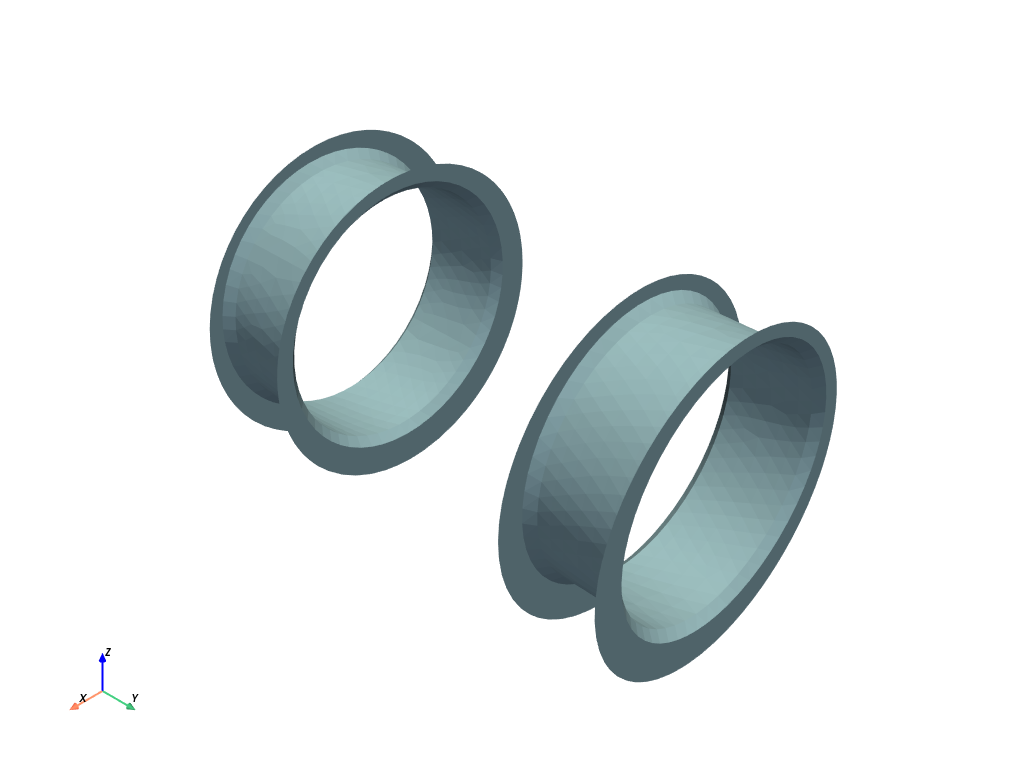

In [40]:
clipped.plot()

In [41]:
verts = clipped.points
normals = clipped.point_normals
verts = verts[np.abs(normals[:,1])<1e-3]

In [42]:
np.max(verts, axis=0), np.min(verts, axis=0)

(pyvista_ndarray([-19.8583 , -59.3246 ,  54.28106], dtype=float32),
 pyvista_ndarray([-21.7487 , -91.1322 ,  35.16813], dtype=float32))

In [43]:
center = (np.max(verts, axis=0) + np.min(verts, axis=0)) / 2
center

pyvista_ndarray([-20.8035  , -75.2284  ,  44.724594], dtype=float32)

In [44]:
diameter = max(max(verts[:,0]) - min(verts[:,0]), max(verts[:,2]) - min(verts[:,2]))
diameter

19.11293

In [46]:
centers = []
for b in clipped.split_bodies():
    body = b.extract_surface()
    verts_tmp = body.points
    normals_tmp = body.point_normals
    verts_tmp = verts_tmp[np.abs(normals_tmp[:,1])<1e-3]
    centers.append((np.max(verts_tmp, axis=0) + np.min(verts_tmp, axis=0)) / 2)
direction = centers[0] - centers[1]
direction

pyvista_ndarray([-1.1445007e+00,  2.8008148e+01, -1.2474060e-03],
                dtype=float32)

In [49]:
cyl_hor = pv.Cylinder(center=center, radius=diameter/2, direction=direction, height=60)

In [50]:
cyl_hor.save("/home/max/Desktop/python_projects/SimJeb/SimJEB_metadata/cylinder_horizontal.stl")

In [55]:
for center, name in zip(
    [[0,-148,5], [0,0,5], [38,-146,5], [51,1.5,5]], 
    ["cyl_fl", "cyl_fr", "cyl_rl", "cyl_rr"]
):
    cyl_tmp_large = pv.Cylinder(center=center, radius=7, direction=[0,0,1], height=20)
    clipped = mesh.clip_surface(cyl_tmp_large, True)
    
    normals_vert = clipped.cell_normals
    direction = np.mean(normals_vert[normals_vert[:,2] > 0.9], axis=0)
    
    verts = clipped.points[abs(clipped.point_normals[:,2]) < 0.1]
    diameter = max(max(verts[:,0]) - min(verts[:,0]), max(verts[:,2]) - min(verts[:,2]))
    
    cyl = pv.Cylinder(
        center=np.mean(verts, axis=0), 
        radius=diameter/2*0.99, 
        direction=direction, 
        height=30
    )
    
    cyl.save(
        f"/home/max/Desktop/python_projects/SimJeb/SimJEB_metadata/{name}.stl"
    )